<h1><span style="color:goldenrod"><b><center>Customer churn project</center></b></span></h1>

<h2><span style="color:coral"><u><center>Importing the libraries</center></u></span></h2>

In [2]:
import numpy as np
import pandas as pd
import re

<h2><span style="color:coral"><u><center>Reading the data</center></u></span></h2>

In [3]:
df = pd.read_excel("../data/Telco_customer_churn.xlsx")

In [4]:
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


<h2><span style="color:coral"><u><center>Info of the data</center></u></span></h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


<h2><span style="color:coral"><u><center>Separating columns in different lists based on non-object type and object type</center></u></span></h2>

In [7]:
list_of_cols_object = [col for col in df.columns if df[col].dtype == "object"]
list_of_cols_not_object = [col for col in df.columns if df[col].dtype != "object"]
print(list_of_cols_object)
print(list_of_cols_not_object)

['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']
['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']


<h2><span style="color:coral"><u><center>Checking for duplicated values in all columns</center></u></span></h2>

In [8]:
for col in df.columns:
    if df[col].duplicated().sum() > 0:
        print(col)

Count
Country
State
City
Zip Code
Lat Long
Latitude
Longitude
Gender
Senior Citizen
Partner
Dependents
Tenure Months
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Paperless Billing
Payment Method
Monthly Charges
Total Charges
Churn Label
Churn Value
Churn Score
CLTV
Churn Reason


<h2><span style="color:coral"><u><center>Checking for null values in all columns</center></u></span></h2>

In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Column name = {col};  total null values = {df[col].isnull().sum()}")

Column name = Churn Reason;  total null values = 5174


<h2><span style="color:coral"><u><center>Replacing NaN with 0</center></u></span></h2>

In [10]:
# display(df["Churn Reason"].unique())
display(df.nunique())

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [11]:
# df["Churn Reason"] = df["Churn Reason"].fillna(0)
df = df.fillna(0)


In [12]:
display(df["Churn Reason"].unique())

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', 0], dtype=object)

<h2><span style="color:coral"><u><center>Converting object type to respective data types</center></u></span></h2>

In [13]:
string_pattern = re.compile(r'^[\d\w\s,_\-]+$')
int_pattern = re.compile(r'^-?\d+$')
float_pattern = re.compile(r'^-?\d*\.\d+$')
datetime_pattern = re.compile(
        r'^\d{4}-\d{2}-\d{2}( \d{2}:\d{2}(:\d{2}(\.\d{3})?)?)?$'
    )

for i in list_of_cols_object:
    col_values = df[i].dropna().astype(str)
    if col_values.apply(lambda x: bool(string_pattern.match(x))).all():
        df[i] = df[i].astype("string")


In [14]:
for i in df.columns:
    values = df[col].dropna().astype(str).sample(min(100, len(df[col])))
    if values.apply(lambda x: bool(int_pattern.match(x))).all():
        df[i] = pd.to_numeric(df[i], downcast='integer', errors='coerce')
    elif values.apply(lambda x: bool(float_pattern.match(x))).all():
        df[i] = pd.to_numeric(df[i], downcast='float', errors='coerce')
    elif values.apply(lambda x: bool(datetime_pattern.match(x))).all():
        df[i] = pd.to_datetime(df[i], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   string 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   string 
 3   State              7043 non-null   string 
 4   City               7043 non-null   string 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   string 
 10  Senior Citizen     7043 non-null   string 
 11  Partner            7043 non-null   string 
 12  Dependents         7043 non-null   string 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   string 
 15  Multiple Lines     7043 non-null   string 
 16  Internet Service   7043 

In [16]:
df.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [17]:
df[["Payment Method", "Churn Reason"]] = df[["Payment Method", "Churn Reason"]].astype("string")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   string 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   string 
 3   State              7043 non-null   string 
 4   City               7043 non-null   string 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   string 
 10  Senior Citizen     7043 non-null   string 
 11  Partner            7043 non-null   string 
 12  Dependents         7043 non-null   string 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   string 
 15  Multiple Lines     7043 non-null   string 
 16  Internet Service   7043 

In [19]:
df = df.replace(' ', 0)

C:\Users\risha\AppData\Local\Temp\ipykernel_33592\2697046482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(' ', 0)


<h2><span style="color:coral"><u><center>Feature Engineering</center></u></span></h2>

In [20]:
df["Churn"] = (df["Churn Reason"] == "0").astype(int)

In [21]:
x = df.drop(columns=["CustomerID", "Churn"])
y = df["Churn"]

<h3><span style="color:lightgreen"><u><center>Manual Encoding the columns with boolean values - Yes and No</center></u></span></h3>

In [22]:
# for col in x.columns:
#     unique_vals = set(x[col].dropna().unique())
#     if unique_vals == {'Yes', 'No'} or unique_vals == {'No', 'Yes'}:
#         x[col] = x[col].map({'Yes':1, 'No':0})

In [23]:
x = x.drop(columns=["Lat Long"])

In [24]:
x.nunique()

Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           21
dtype: int64

In [25]:
x.head()

,Count,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,33.964131,-118.272783,Male,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,34.059281,-118.307420,Female,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,34.048013,-118.293953,Female,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,34.039224,-118.266293,Male,No,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


<h3><span style="color:lightgreen"><u><center>Dropping all unnecessary features from x -> dataset of independent variables/ features</center></u></span></h3>

In [26]:
x = x.drop(columns=["Count","Country", "State", "City", "Zip Code", "Latitude", "Longitude", "Churn Label", "Churn Value", "Churn Score", "Churn Reason"])

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   string 
 1   Senior Citizen     7043 non-null   string 
 2   Partner            7043 non-null   string 
 3   Dependents         7043 non-null   string 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   string 
 6   Multiple Lines     7043 non-null   string 
 7   Internet Service   7043 non-null   string 
 8   Online Security    7043 non-null   string 
 9   Online Backup      7043 non-null   string 
 10  Device Protection  7043 non-null   string 
 11  Tech Support       7043 non-null   string 
 12  Streaming TV       7043 non-null   string 
 13  Streaming Movies   7043 non-null   string 
 14  Contract           7043 non-null   string 
 15  Paperless Billing  7043 non-null   string 
 16  Payment Method     7043 

In [28]:
x["Total Charges"] = x["Total Charges"].astype(float)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   string 
 1   Senior Citizen     7043 non-null   string 
 2   Partner            7043 non-null   string 
 3   Dependents         7043 non-null   string 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   string 
 6   Multiple Lines     7043 non-null   string 
 7   Internet Service   7043 non-null   string 
 8   Online Security    7043 non-null   string 
 9   Online Backup      7043 non-null   string 
 10  Device Protection  7043 non-null   string 
 11  Tech Support       7043 non-null   string 
 12  Streaming TV       7043 non-null   string 
 13  Streaming Movies   7043 non-null   string 
 14  Contract           7043 non-null   string 
 15  Paperless Billing  7043 non-null   string 
 16  Payment Method     7043 

In [29]:
x.nunique()

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
CLTV                 3438
dtype: int64

<h3><span style="color:lightgreen"><u><center>Automated encoding and feature scaling using the scikit-learn linrary</center></u></span></h3>

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

binary_cols = []
onehot_cols = []
numeric_cols = []
for col in x.columns:
    if x[col].nunique() == 2 and x[col].dtype == 'string':
        binary_cols.append(col)
    elif x[col].nunique() > 2 and x[col].dtype == 'string':
        onehot_cols.append(col)
    else:
        numeric_cols.append(col)
# label encoder for binary columns
le = LabelEncoder()
for col in binary_cols:
    x[col] = le.fit_transform(x[col])

# one hot encoder for non-binary string columns - onehot_cols

ohe = OneHotEncoder()
onehot = ohe.fit_transform(x[onehot_cols])
onehot_dense = onehot.toarray()

onehot_df = pd.DataFrame(onehot_dense, columns=ohe.get_feature_names_out(onehot_cols), index=x.index)

x = x.drop(columns=onehot_cols)

x = pd.concat([x, onehot_df], axis=1)

# Scaling the numeric values of the columns in x
scaler = StandardScaler()
x[numeric_cols] = scaler.fit_transform(x[numeric_cols])

In [31]:
print(onehot_cols)

['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']


In [32]:
print(numeric_cols)

['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']


In [33]:
print(binary_cols)

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [36]:
x_test

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,CLTV,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2880,0,0,1,1,0.269929,1,1,-1.492682,-0.628657,-1.156658,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4580,1,0,1,0,-0.422317,1,1,-0.166568,-0.399440,-0.383183,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5543,0,1,1,0,-0.422317,1,0,-1.301576,-0.763659,-1.498171,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
804,0,0,0,0,-1.073843,1,0,-0.282894,-0.834116,-0.245395,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6268,0,0,0,0,-0.625919,1,0,0.501474,-0.393705,0.992165,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,1,0,1,1,0.962175,0,1,-0.424147,0.266989,1.221249,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3690,1,0,0,1,-1.277445,1,1,0.189056,-0.974698,-1.432235,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3138,0,1,0,0,-1.236724,1,1,0.632756,-0.933558,-1.280921,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
455,0,0,0,0,-1.277445,1,0,-1.504315,-0.997177,0.685311,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy = ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59       374
           1       0.84      0.89      0.86      1035

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy =  0.7963094393186657


<h2><span style="color:coral"><u><center>Using SVC for model training</center></u></span></h2>

In [38]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred_svm))
print("Accuracy = ", accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58       374
           1       0.84      0.91      0.87      1035

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.81      0.80      1409

Accuracy =  0.8055358410220014


<h2><span style="color:coral"><u><center>Using Decision Tree for model training</center></u></span></h2>

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred_dt))
print("Accuracy = ", accuracy_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       374
           1       0.82      0.83      0.82      1035

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

Accuracy =  0.7423704755145494


<h2><span style="color:coral"><u><center>Using Random Forest for model training</center></u></span></h2>

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [43]:
print(classification_report(y_test, y_pred_rf))
print("Accuracy = ", accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       374
           1       0.83      0.89      0.86      1035

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy =  0.7892122072391767


<h2><span style="color:coral"><u><center>Using XGBoost for model training</center></u></span></h2>

In [44]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

d:\Projects\ML_AI_projects\Logistic_regression\main_app\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [45]:
print(classification_report(y_test, y_pred_xgb))
print("Accuracy = ", accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       374
           1       0.83      0.87      0.85      1035

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Accuracy =  0.7714691270404542


<h2><span style="color:coral"><u><center>Hyper parameter tuning for better accuracy</center></u></span></h2>

<h3><span style="color:lightgreen"><u><center>Random Forest classifier hyper parameter tuning</center></u></span></h3>

In [57]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [50,100,200,250],
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': [2,5,10,15]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid = grid,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(x_test)

Best params:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.8097290626807523


In [59]:
print(classification_report(y_test, y_pred_grid))
print("Accuracy = ", accuracy_score(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       374
           1       0.84      0.91      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy =  0.8026969481902059


<h3><span style="color:lightgreen"><u><center>XGB classifier hyper parameter tuning</center></u></span></h3>

In [63]:
xgb_grid = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_grid_search = GridSearchCV(
    estimator = xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid = xgb_grid,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid_search.fit(x_train, y_train)

print('Best params: ', xgb_grid_search.best_params_)
print('Best score: ', xgb_grid_search.best_score_)

best_model = xgb_grid_search.best_estimator_
y_pred_xgb_grid = best_model.predict(x_test)

Best params:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score:  0.8136348090861952


In [64]:
print(classification_report(y_test, y_pred_xgb_grid))
print("Accuracy = ", accuracy_score(y_test, y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       374
           1       0.84      0.90      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy =  0.801277501774308


<h2><span style="color:coral"><u><center>SMOTE and Hyper parameter tuning for better accuracy</center></u></span></h2>

In [78]:
from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
rfc = RandomForestClassifier(random_state=42)
param_grid_rfc = {
    'n_estimators': [50,100,200,250],
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': [2,5,10,15]
}

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid_rfc, cv=5, scoring='accuracy', n_jobs = -1)
grid_search_rfc.fit(x_train_smote, y_train_smote)

print('Best params: ', grid_search_rfc.best_params_)
print('Best score: ', grid_search_rfc.best_score_)

best_model_rfc = grid_search_rfc.best_estimator_
y_pred_rfc_grid = best_model_rfc.predict(x_test)

Best params:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
Best score:  0.8639175257731958


In [79]:
print(classification_report(y_test, y_pred_rfc_grid))
print("Accuracy = ", accuracy_score(y_test, y_pred_rfc_grid))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       467
           1       0.87      0.85      0.86      1294

    accuracy                           0.79      1761
   macro avg       0.73      0.74      0.74      1761
weighted avg       0.80      0.79      0.79      1761

Accuracy =  0.7910278250993753


In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
xgbs = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgbs = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search_xgbs = GridSearchCV(estimator=xgbs, param_grid = param_grid_xgbs, cv=5, scoring='accuracy', n_jobs = -1)
grid_search_xgbs.fit(x_train_smote, y_train_smote)

print('Best params: ', grid_search_xgbs.best_params_)
print('Best score: ', grid_search_xgbs.best_score_)

best_model_xgbs = grid_search_xgbs.best_estimator_
y_pred_xgbs_grid = best_model_xgbs.predict(x_test)

Best params:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100, 'subsample': 0.8}
Best score:  0.8621134020618557


In [81]:
print(classification_report(y_test, y_pred_xgbs_grid))
print("Accuracy = ", accuracy_score(y_test, y_pred_xgbs_grid))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       467
           1       0.86      0.84      0.85      1294

    accuracy                           0.78      1761
   macro avg       0.72      0.73      0.73      1761
weighted avg       0.79      0.78      0.79      1761

Accuracy =  0.7830777967064169


<h2><span style="color:coral"><u><center>adding class weight to RFC</center></u></span></h2>

In [82]:
smote = SMOTE(random_state=42)
rfc_balanced = RandomForestClassifier(class_weight='balanced',random_state=42)
param_grid_rfc_balanced = {
    'n_estimators': [50,100,200,250],
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': [2,5,10,15]
}

grid_search_rfc_balanced = GridSearchCV(estimator=rfc, param_grid = param_grid_rfc_balanced, cv=5, scoring='accuracy', n_jobs = -1)
grid_search_rfc_balanced.fit(x_train_smote, y_train_smote)

print('Best params: ', grid_search_rfc_balanced.best_params_)
print('Best score: ', grid_search_rfc_balanced.best_score_)

best_model_rfc_balanced = grid_search_rfc_balanced.best_estimator_
y_pred_rfc_grid_balanced = best_model_rfc_balanced.predict(x_test)

Best params:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
Best score:  0.8639175257731958


In [83]:
print(classification_report(y_test, y_pred_rfc_grid_balanced))
print("Accuracy = ", accuracy_score(y_test, y_pred_rfc_grid_balanced))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       467
           1       0.87      0.85      0.86      1294

    accuracy                           0.79      1761
   macro avg       0.73      0.74      0.74      1761
weighted avg       0.80      0.79      0.79      1761

Accuracy =  0.7910278250993753


<h2><span style="color:coral"><u><center>using grid search cv to enhnace the score with tuning recall, f1-score and precision</center></u></span></h2>

In [92]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

rfc_cw = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid_rfc_cw = {
    'n_estimators': [50,100,200,250],
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': [2,5,10,15]
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

grid_search_rfc_cw = GridSearchCV(
    estimator=rfc_cw,
    param_grid=param_grid_rfc_cw,
    scoring=scoring,
    refit='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search_rfc_cw.fit(x_train_smote, y_train_smote)
print('Best params:', grid_search_rfc_cw.best_params_)
print('Best F1 score:', grid_search_rfc_cw.best_score_)

Y_pred_rfc_cw = grid_search_rfc_cw.predict(x_test)

Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
Best F1 score: 0.8639175257731958


In [93]:
print(classification_report(y_test, Y_pred_rfc_cw))
print("Accuracy = ", accuracy_score(y_test, Y_pred_rfc_cw))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       467
           1       0.87      0.85      0.86      1294

    accuracy                           0.79      1761
   macro avg       0.73      0.74      0.74      1761
weighted avg       0.80      0.79      0.79      1761

Accuracy =  0.7910278250993753


In [ ]:
# rf with hyper parameter tuning, class weighting and SMOTE; accuracy = 0.8639175257731958, Best params:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
# rf with hyper parameter tuning and SMOTE; accuracy: 0.8639175257731958, Best params:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
# rf with just hyper parameter tuning, accuracy:  0.8097290626807523, Best params:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
# rf without anything above - accuracy: 0.7892122072391767
# rf with smote, hyper parameter tuning, class weight and refiting f1-score; Best F1 score: 0.8634641371184564, Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}

<h2><span style="color:coral"><u><center>Using LightGBM for classification on customer churn</center></u></span></h2>

In [95]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
classes = np.unique(y_train_smote)
class_counts = np.bincount(y_train_smote)
class_weights = {
    cls: sum(class_counts) / c for cls, c in zip(classes, class_counts)
}

lgbm = lgb.LGBMClassifier(class_weight = class_weights, random_state = 42)
param_grid_lgbm = {
    'num_leaves':[31,50],
    'max_depth':[-1,10,20,30],
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators':[100,200]
}
grid_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1
)
grid_lgbm.fit(x_train_smote, y_train_smote)
print('Best params LightGBM:', grid_lgbm.best_params_)
print('Best F1 LightGBM:', grid_lgbm.best_score_)
y_pred_lgmb = grid_lgbm.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3880, number of negative: 3880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 7760, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [96]:
print(classification_report(y_test, y_pred_lgmb))
print("Accuracy = ", accuracy_score(y_test, y_pred_lgmb))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       467
           1       0.86      0.85      0.86      1294

    accuracy                           0.79      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761

Accuracy =  0.7898921067575241


<h2><span style="color:coral"><u><center>Using CatBoost for classification on customer churn</center></u></span></h2>

In [98]:
from catboost import CatBoostClassifier
classes = np.unique(y_train_smote)
class_counts = np.bincount(y_train_smote)
class_weights = [sum(class_counts) / c for c in class_counts]

catboost = CatBoostClassifier(class_weights = class_weights, verbose=0, random_state=42)
param_grid_cat = {
    'depth':[6,10,20],
    'learning_rate':[0.01, 0.1, 0.2],
    'iterations': [100,200]
}
grid_cat = GridSearchCV(
    estimator=catboost,
    param_grid = param_grid_cat,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1
)
grid_cat.fit(x_train_smote, y_train_smote)
print('Best params CatBoost:', grid_cat.best_params_)
print('Best F1 CatBoost:', grid_cat.best_score_)
y_pred_cat = grid_cat.predict(x_test)

d:\Projects\ML_AI_projects\Logistic_regression\main_app\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\ML_AI_projects\Logistic_regression\main_app\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\ML_AI_projects\Logistic_regression\main_app\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline

Best params CatBoost: {'depth': 10, 'iterations': 200, 'learning_rate': 0.1}
Best F1 CatBoost: 0.8609805460989384


In [99]:
print(classification_report(y_test, y_pred_lgmb))
print("Accuracy = ", accuracy_score(y_test, y_pred_lgmb))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       467
           1       0.86      0.85      0.86      1294

    accuracy                           0.79      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761

Accuracy =  0.7898921067575241


<h2><span style="color:coral"><u><center>SHAP explanation for the best model so far for customer churn- LightGBM</center></u></span></h2>

d:\Projects\ML_AI_projects\Logistic_regression\main_app\Lib\site-packages\shap\explainers\_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


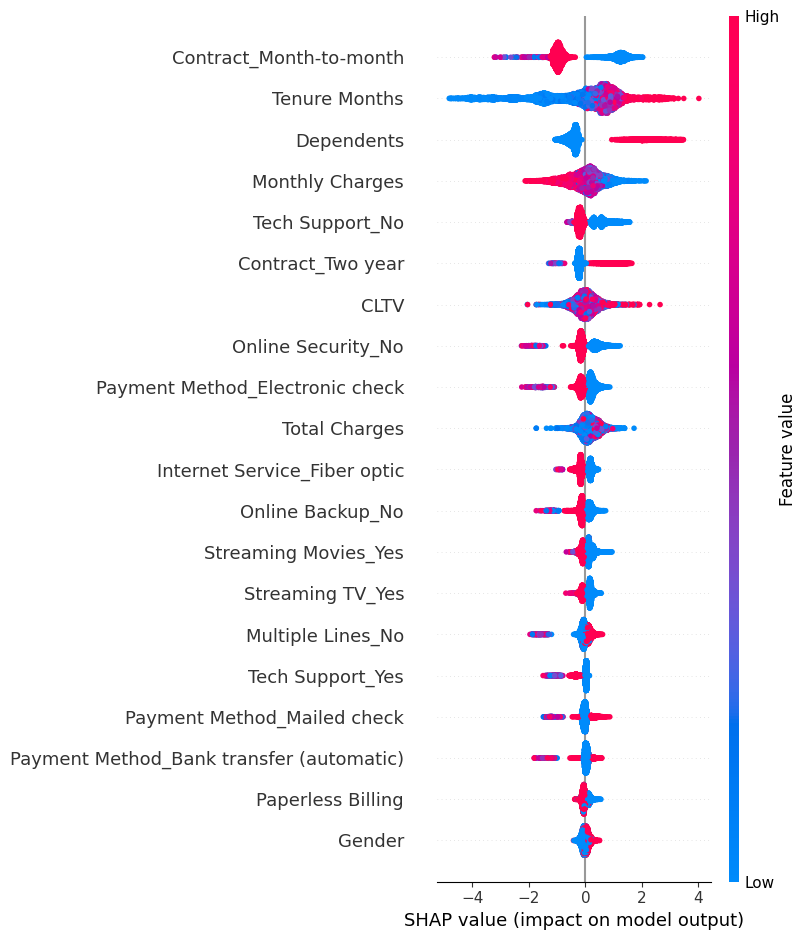

In [104]:
import shap
explainer = shap.TreeExplainer(grid_lgbm.best_estimator_)
shap_values = explainer.shap_values(x_train_smote)
shap.summary_plot(shap_values, x_train_smote)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train_smote.iloc[0,:])